## Ridge Regresyon

**Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.**

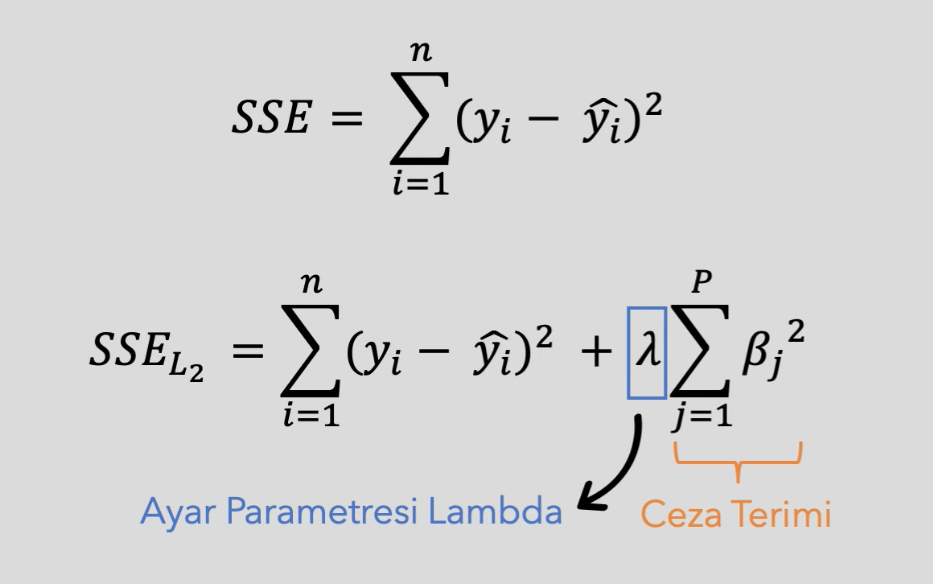

Aşırı öğrenmeye karşı dirençli.

Yanlıdır  fakat varyansı düşüktür. (Bazen yanlı modelleri daha çok tercih ederiz.)

Çok fazla parametre olduğunda EKK'ya göre daha iyidir.

Çok boyutluluk lanetine karşı çözüm sunar.

Çoklu doğrusal bağlantı problemi olduğunda etkilidir.

Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.

λ kritik roldedir. İki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.

λ için iyi bir değer bulunması önemlidir. Bunun için CV yöntemi kullanılır.

## Ridge Regresyon - Model

#### Model

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League', 'Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_ ,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_Train, X_Test, Y_Train,Y_Test = train_test_split(X,
                                                   y,
                                                   test_size=25,
                                                   random_state=42)
from sklearn.linear_model import Ridge



In [5]:
ridge_model = Ridge(alpha=0.1).fit(X_Train, Y_Train)
ridge_model.coef_

array([-1.68604476e+00,  6.81567419e+00,  5.10840578e+00, -1.86985452e+00,
       -1.33713409e+00,  5.06956913e+00,  1.09285137e+00, -2.19623846e-01,
        8.50073749e-02, -8.19991709e-01,  1.58485514e+00,  1.14715552e+00,
       -7.26513640e-01,  2.74918583e-01,  3.96649637e-01, -2.89231948e+00,
        6.89960167e+01, -1.19746288e+02, -1.25220663e+01])

In [6]:
import numpy as np

In [7]:
from matplotlib import pyplot as plt

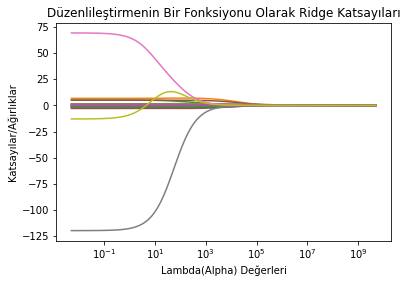

In [8]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_Train, Y_Train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

### Tahmin

In [9]:
import pandas as pd

In [10]:
y_pred = ridge_model.predict(X_Test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
np.sqrt(mean_squared_error(Y_Test, y_pred))

263.4769752994155

#### Model Tuning

In [13]:
# Lamda değerlerinin hangisinin daha iyi olduğunu seçeceğiz

In [14]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [15]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [19]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,
                   scoring="neg_mean_squared_error",
                   normalize=True)

In [21]:
ridge_cv.fit(X_Train,Y_Train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [22]:
ridge_cv.alpha_

0.4348745013088917

In [23]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_,normalize=True).fit(X_Train,Y_Train)

In [26]:
np.sqrt(mean_squared_error(Y_Test, ridge_tuned.predict(X_Test)))

305.2188596590948